In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../../DataSets/West_Africa_And_India_Dams_2018/Cleaned_Data.csv')

In [3]:
data.head()

,Country,ISO,Dam Name,Dam Purpose,Admin Unit(State),Nearest City,River,Operational Since Year,PhotoVoltic Surface[MW],Dam Height (meters),Reservoir Capacity (million cubic meters),Reservoir Area (square km)
0,India,IND,Thonnur,Irrigation,Karnataka,Mysore,Thonnur Halla,1000,31.20,24.38,12.460,3.120
1,India,IND,Cumbhum,Irrigation,Andhra Pradesh,Ongole,Gundlakamma,1500,233.27,18.00,105.330,23.327
2,India,IND,Chandra Prabha,Irrigation,Uttar Pradesh,Varanasi,Chandraprabha,1666,1633.64,20.12,113.267,163.364
3,India,IND,Rajsamand,Irrigation,Rajasthan,Kankroli,Gomti,1671,77.90,17.80,98.650,7.790
4,India,IND,Barwa,Irrigation,Uttar Pradesh,Jhansi,Barwa Nala,1694,708.50,21.03,10.200,70.850


<h2> Performing Analysis </h2>

In [4]:
# Describing numeric columns
data.describe()

,PhotoVoltic Surface[MW],Dam Height (meters),Reservoir Capacity (million cubic meters),Reservoir Area (square km)
count,2313.000000,3104.000000,2968.000000,2313.000000
mean,439.201168,23.316697,85.593114,43.920117
std,10824.289772,16.216902,515.419902,1082.428977
min,0.015500,0.710000,0.013520,0.001550
25%,3.150000,16.000000,1.970000,0.315000
50%,11.000000,18.995000,4.630000,1.100000
75%,66.470000,24.400000,18.049500,6.647000
max,511100.000000,260.500000,9750.000000,51110.000000


In [5]:
# Describing categorical columns
data[data.dtypes[data.dtypes == 'object'].index[:]].describe()

,Country,ISO,Dam Name,Dam Purpose,Admin Unit(State),Nearest City,River,Operational Since Year
count,3131,3131,3131,3131,3129,3024,3039,3131
unique,1,1,3030,3,28,1125,1424,136
top,India,IND,Bori,Irrigation,Maharashtra,Sidhi,Local Nala,Unknown
freq,3131,3131,6,2949,1064,28,550,436


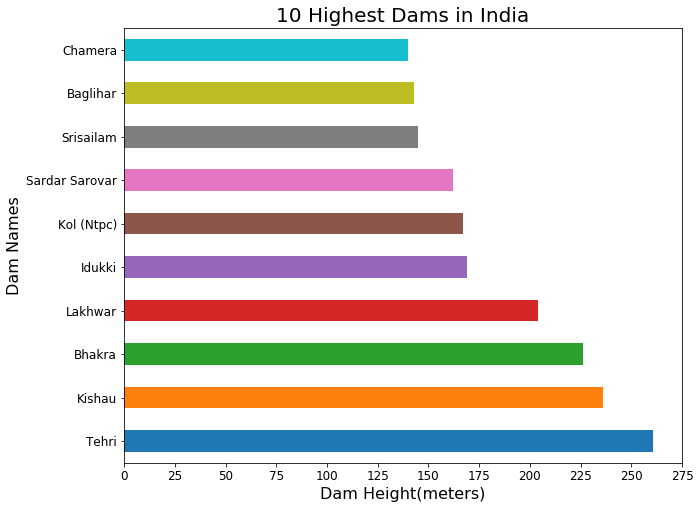

In [10]:
# Checking 10 highest dams
data.sort_values(by = 'Dam Height (meters)', ascending = False).head(10)[['Dam Name', 'Dam Height (meters)']].plot(
    y = 'Dam Height (meters)', x = 'Dam Name', kind = 'barh', figsize = (10, 8), xticks = np.arange(0,300,25), 
    legend = False, fontsize = 12)

plt.xlabel('Dam Height(meters)', fontsize = 16)
plt.ylabel('Dam Names', fontsize = 16)
plt.title('10 Highest Dams in India', fontsize = 20)

plt.show()

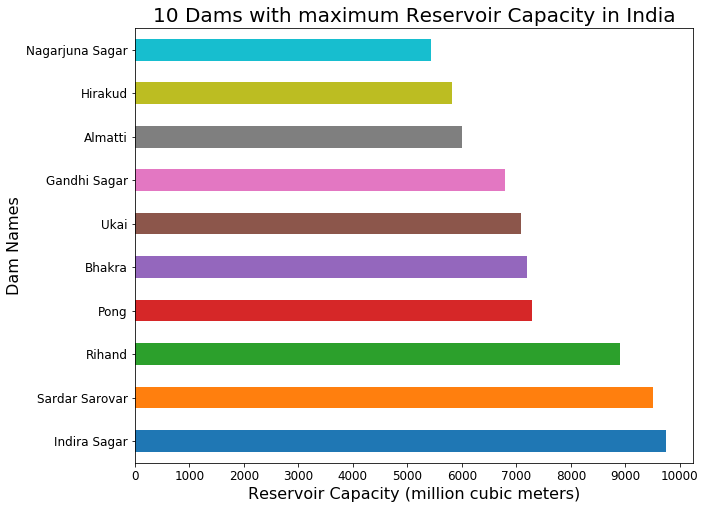

In [12]:
# Checking 10 dams with maximum Reservoir Capacity
data.sort_values(
    by = 'Reservoir Capacity (million cubic meters)', ascending = False).head(10)[['Dam Name', 'Reservoir Capacity (million cubic meters)']].plot(
    y = 'Reservoir Capacity (million cubic meters)', x = 'Dam Name', kind = 'barh', figsize = (10, 8), 
    xticks = np.arange(0,10001,1000), legend = False, fontsize = 12)

plt.xlabel('Reservoir Capacity (million cubic meters)', fontsize = 16)
plt.ylabel('Dam Names', fontsize = 16)
plt.title('10 Dams with maximum Reservoir Capacity in India', fontsize = 20)

plt.show()

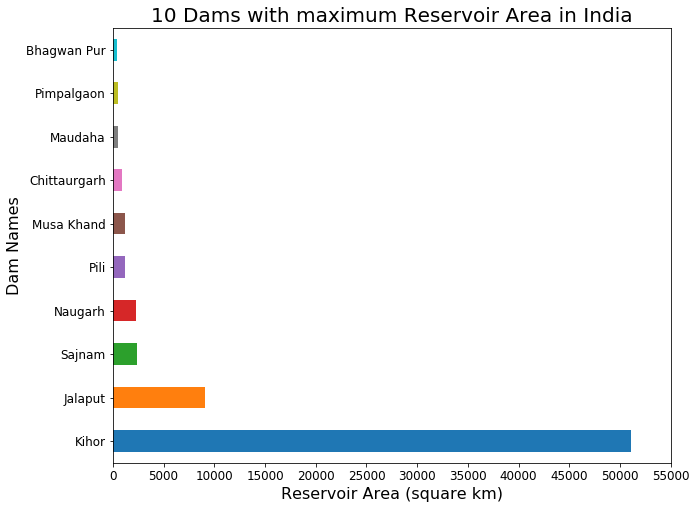

In [18]:
# Checking 10 dams with maximum Reservoir Area
data.sort_values(
    by = 'Reservoir Area (square km)', ascending = False).head(10)[['Dam Name', 'Reservoir Area (square km)']].plot(
    y = 'Reservoir Area (square km)', x = 'Dam Name', kind = 'barh', figsize = (10, 8), 
    xticks = np.arange(0,60000,5000), legend = False, fontsize = 12)

plt.xlabel('Reservoir Area (square km)', fontsize = 16)
plt.ylabel('Dam Names', fontsize = 16)
plt.title('10 Dams with maximum Reservoir Area in India', fontsize = 20)

plt.show()

In [27]:
data.iloc[: , [9, 10, 11]].corr()

,Dam Height (meters),Reservoir Capacity (million cubic meters),Reservoir Area (square km)
Dam Height (meters),1.000000,0.515656,0.002633
Reservoir Capacity (million cubic meters),0.515656,1.000000,0.002954
Reservoir Area (square km),0.002633,0.002954,1.000000


- There is no correlation between Reservoir Area and Reservoir Capacity. We can infer that Reservoir Capacity is not associated with Reservoir Area. We can infer that high reservoir capacity is not due to it's area but due to the depth of reservoir.<br> 
- There is little positive correlation between Dam Height and Reservoir Capacity, which to some extent supports the fact that deeper reservoirs tend to have higher dams. <br> <br>

- <b>Note :</b> The data might be inconsistent with wrong entries, as on increasing Reservoir Area and Dam Height Reservoir Capacity(Volume) must also increase.

In [30]:
data[data['Dam Name'] == 'Tehri']

,Country,ISO,Dam Name,Dam Purpose,Admin Unit(State),Nearest City,River,Operational Since Year,PhotoVoltic Surface[MW],Dam Height (meters),Reservoir Capacity (million cubic meters),Reservoir Area (square km)
3033,India,IND,Tehri,"Irrigation, Hydropower",Uttaranchal,Tehri,Bhagirathi,2005,0.42,260.5,2620.0,0.042


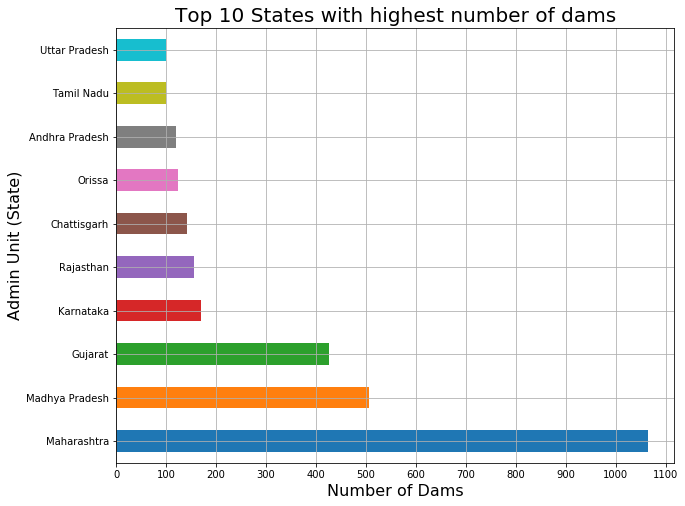

In [37]:
# Top 10 states with highest number of dams
data['Admin Unit(State)'].value_counts().iloc[0:10].plot(
    kind = 'barh', figsize = (10, 8), xticks = np.arange(0,1200, 100), grid = True)

plt.xlabel('Number of Dams', fontsize = 16)
plt.ylabel('Admin Unit (State)', fontsize = 16)
plt.title('Top 10 States with highest number of dams', fontsize = 20)

plt.show()